In [13]:
from sklearn.datasets import fetch_openml
import numpy as np

Load the full MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

In [14]:
X.shape

(70000, 784)

In [15]:
y.shape

(70000,)

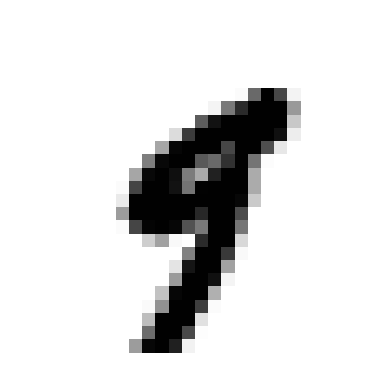

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [17]:
y[36000]

9

In [18]:
# Split into train/test sets
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]



In [19]:
# Create binary labels for '5'
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [20]:
#Confirm class distribution
print("Number of 5s:", np.sum(y_train_5))
print("Number of not-5s:", np.sum(~y_train_5))

Number of 5s: 5421
Number of not-5s: 54579


In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [22]:
sgd_clf.predict([some_digit])

array([False])

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [24]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [27]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # computes precision


0.8370879772350012

In [28]:
recall_score(y_train_5, y_train_pred)     # computes recall

0.6511713705958311

In [29]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [30]:
y_scores = sgd_clf.decision_function([some_digit])

In [31]:
y_scores

array([-3491.23647576])

In [32]:
threshold = 0

In [35]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [36]:
threshold = 200000

In [37]:
y_some_digit_pred = (y_scores > threshold)

In [38]:
y_some_digit_pred

array([False])

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [40]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

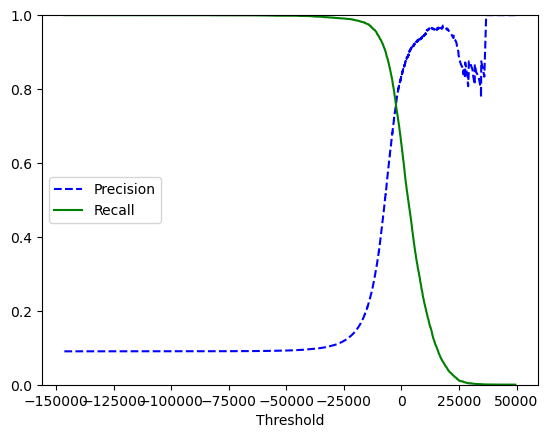

In [41]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [45]:
y_train_pred_90 = (y_scores > 25000)

In [46]:
precision_score(y_train_5, y_train_pred_90)

0.8823529411764706

In [47]:
recall_score(y_train_5, y_train_pred_90)

0.011068068622025456

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


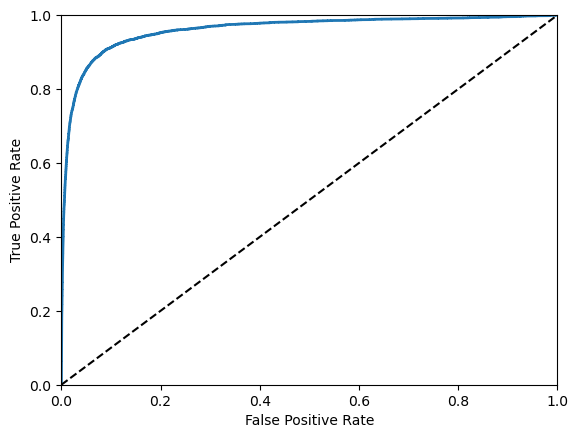

In [51]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(
    forest_clf,
    X_train,
    y_train_5,
    cv=3,
    method="predict_proba"  # ← this is key
)


In [54]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

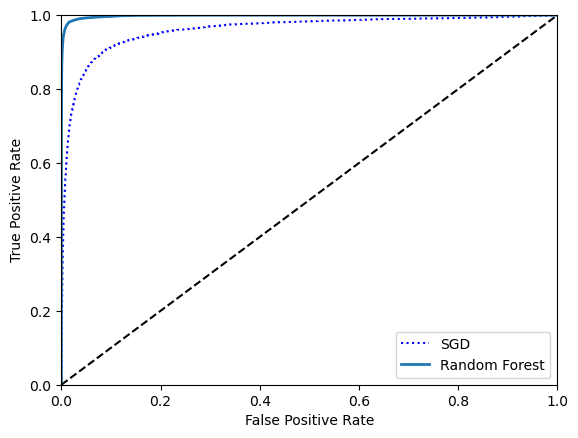

In [55]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [57]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [58]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5

SGDClassifier(random_state=42)

In [59]:
sgd_clf.predict([some_digit])

array([3])

In [62]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [63]:
some_digit_scores

array([[-42309.24702339, -24514.78707295, -21802.99686514,
          -253.56670849,  -6692.29918582,  -5022.40064344,
        -34623.10033652,  -8392.84727568,  -3181.89959952,
         -2356.71582334]])

In [64]:
np.argmax(some_digit_scores)

3

In [65]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [66]:
sgd_clf.classes_[3]

3

In [67]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([9])

In [68]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.01, 0.  , 0.01, 0.15, 0.  , 0.  , 0.04, 0.  , 0.79]])

In [69]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [74]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [75]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

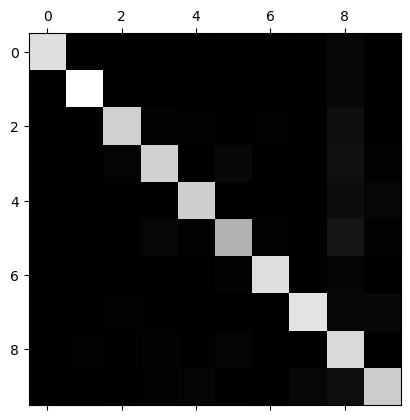

In [78]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [79]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

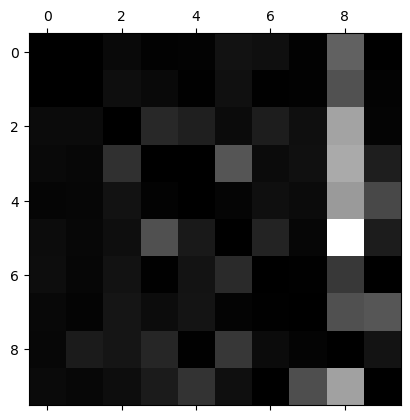

In [80]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [85]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded.reshape((n_rows, images_per_row, size, size)).transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    plt.imshow(image_grid, cmap=matplotlib.cm.binary, **options)
    plt.axis("off")



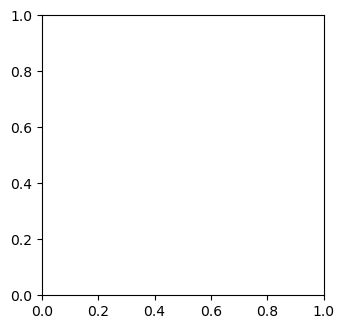

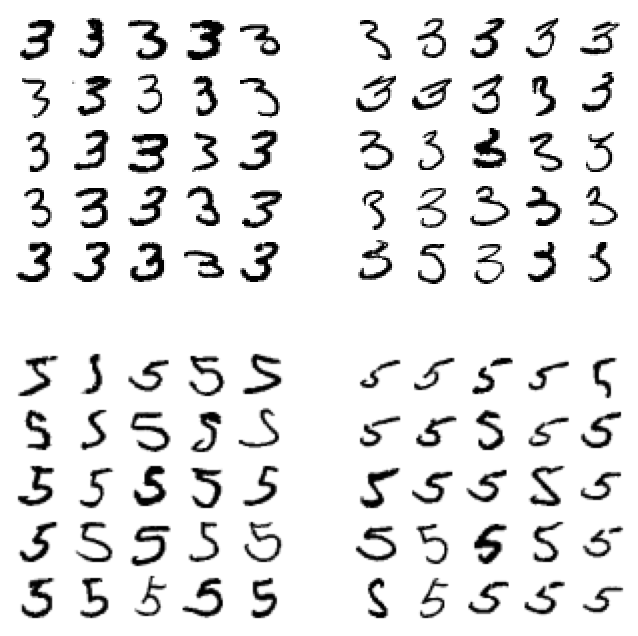

In [86]:
plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


In [87]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [88]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [89]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")


0.9764102655606048